CS575 Project_Apple dataset

Name- Vipin Gupta

Roll- 2011MT22

#Downloading & Exporting the dataset

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime

In [ ]:
#download data
apple = pdr.DataReader('AAPL', 'yahoo', start=datetime(2014, 8, 1), end=datetime(2016, 11, 30))

In [ ]:
#print first few lines of data
print(apple.head())

                 High        Low       Open      Close       Volume  Adj Close
Date                                                                          
2014-08-01  24.155001  23.702499  23.725000  24.032499  194044000.0  21.657644
2014-08-04  24.145000  23.792500  24.092501  23.897499  159832000.0  21.535982
2014-08-05  23.920000  23.590000  23.840000  23.780001  223732000.0  21.430096
2014-08-06  23.870001  23.677500  23.687500  23.740000  154232000.0  21.394049
2014-08-07  23.987499  23.525000  23.732500  23.620001  186844000.0  21.391787


In [ ]:
#export and save as csv files
apple.to_csv('Apple_stock.csv', sep=',')

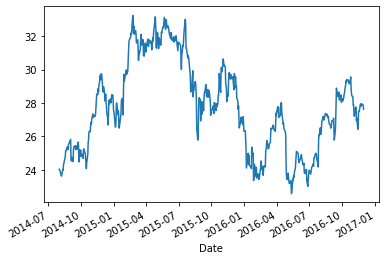

In [ ]:
#Visulaizing the close data
import matplotlib.pyplot as plt
apple["Close"].plot()

#Statistical analysis like ACF, PACF, ADF, KPSS Test

In [ ]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller,kpss

In [ ]:
#ADF Test

def adf_test(atr):

    #Perform Dickey-Fuller test:
    timeseries = apple[atr].dropna()
    print ('Results of Dickey-Fuller Test for ',atr,'\n')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

#apply adf test on the series
adf_test('Close')

Results of Dickey-Fuller Test for  Close 

Test Statistic                  -2.170605
p-value                          0.217087
#Lags Used                       0.000000
Number of Observations Used    588.000000
Critical Value (1%)             -3.441520
Critical Value (5%)             -2.866468
Critical Value (10%)            -2.569394
dtype: float64


The p value obtained is greater than significance level of 0.05  and test statistic is higher than any of the critical values 

so we cant reject the null hypothesis so the time series is non stationary.

In [ ]:
#KPSS Test

def kpss_test(atr):
    timeseries = apple[atr].dropna()
    print ('Results of KPSS Test for ',atr)
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

kpss_test('Close')

Results of KPSS Test for  Close
Test Statistic            0.655743
p-value                   0.017569
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


The p value is significant less than 0.05 hence we can reject the null hypothesis so series is non stationary

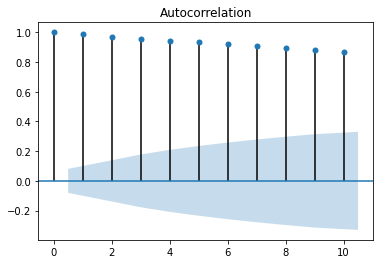

In [ ]:
# ACF Test of differenced data
plot_acf(apple['Close'].dropna(), lags=10)
plt.show()


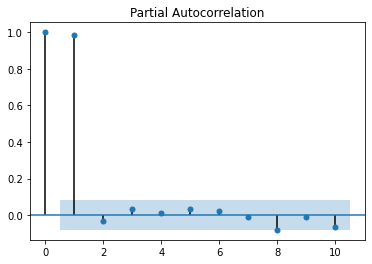

In [ ]:
# PACF Test of differenced data
plot_pacf(apple['Close'].dropna(), lags=10)
plt.show()

In [ ]:
#Differencing to make data as stationary

#Differencing the data
apple['diff'] = apple['Close'].diff(periods=1)

#Visulaizing the differenced data
apple["diff"].plot()


In [ ]:
# ADF Test of differenced data
adf_test('diff')


In [ ]:
# KPSS Test of differenced data
kpss_test('diff')


In [ ]:
# ACF Test of differenced data
plot_acf(apple['diff'].dropna(), lags=10)
plt.show()


In [ ]:
# PACF Test of differenced data
plot_pacf(apple['diff'].dropna(), lags=10)
plt.show()

#Exponential

In [ ]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
n = int(len(apple["Close"])*0.8)
data = apple['Close'].to_numpy()
train2 = data[:n]
test2 = data[n:]
date = (apple.index)

In [ ]:
Exp_model = ExponentialSmoothing(apple.Close,trend='mul',seasonal='mul',seasonal_periods=4)
apple['Pred_Exp'] = Exp_model.fit(smoothing_level = 0.9,smoothing_slope= 0.1,smoothing_seasonal = 0.2).fittedvalues.shift(0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Prediction using Exponential Smoothing')

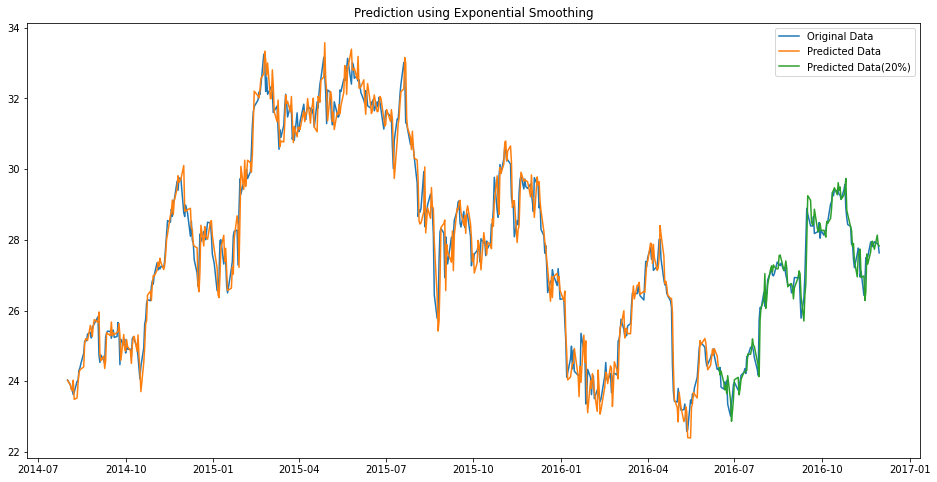

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(date,data, label='Original Data')
plt.plot(date[:n],apple.Pred_Exp[:n], label='Predicted Data')
plt.plot(date[n:],apple.Pred_Exp[n:], label='Predicted Data(20%)')
plt.legend()
plt.title('Prediction using Exponential Smoothing')

In [ ]:
#Calculation of MSE for comparing the model
rmse2 = (np.mean(np.power((np.array(test2)-np.array(apple.Pred_Exp[n:])),2)))
print('MSE value using Exponential Smoothing model: ',rmse2)

MSE value using Exponential Smoothing model:  0.14894212244684166


#ARIMA

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing data
df = pd.read_csv('Apple_stock.csv')
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-08-01,24.155001,23.702499,23.725000,24.032499,194044000.0,21.657644
1,2014-08-04,24.145000,23.792500,24.092501,23.897499,159832000.0,21.535982
2,2014-08-05,23.920000,23.590000,23.840000,23.780001,223732000.0,21.430096
3,2014-08-06,23.870001,23.677500,23.687500,23.740000,154232000.0,21.394049
4,2014-08-07,23.987499,23.525000,23.732500,23.620001,186844000.0,21.391787


In [ ]:
# Extracting the required columns
df = df[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    589 non-null    object 
 1   Close   589 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
# Changing the Date column to proper DateTime object
df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    589 non-null    datetime64[ns]
 1   Close   589 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.3 KB


In [ ]:
# Making Date column to be the index
df.columns=['Date','Closing price']
df.set_index('Date', inplace=True)
df.head()

,Closing price
Date,
2014-08-01,24.032499
2014-08-04,23.897499
2014-08-05,23.780001
2014-08-06,23.740000
2014-08-07,23.620001


Text(0.5, 0, 'Year')

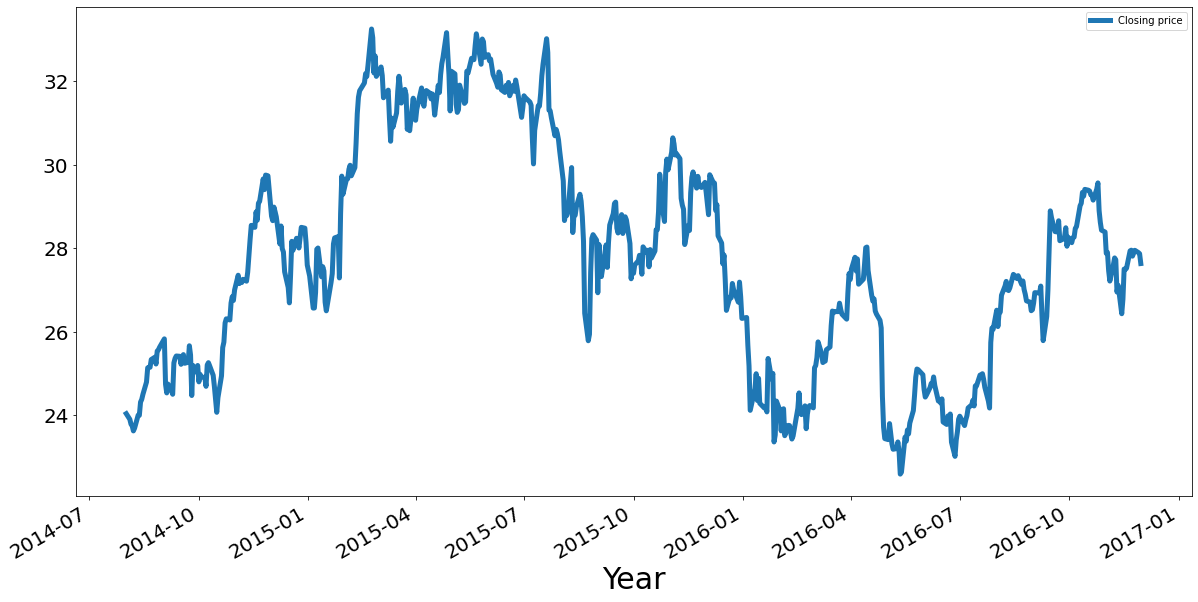

In [ ]:
# Plot
df.plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

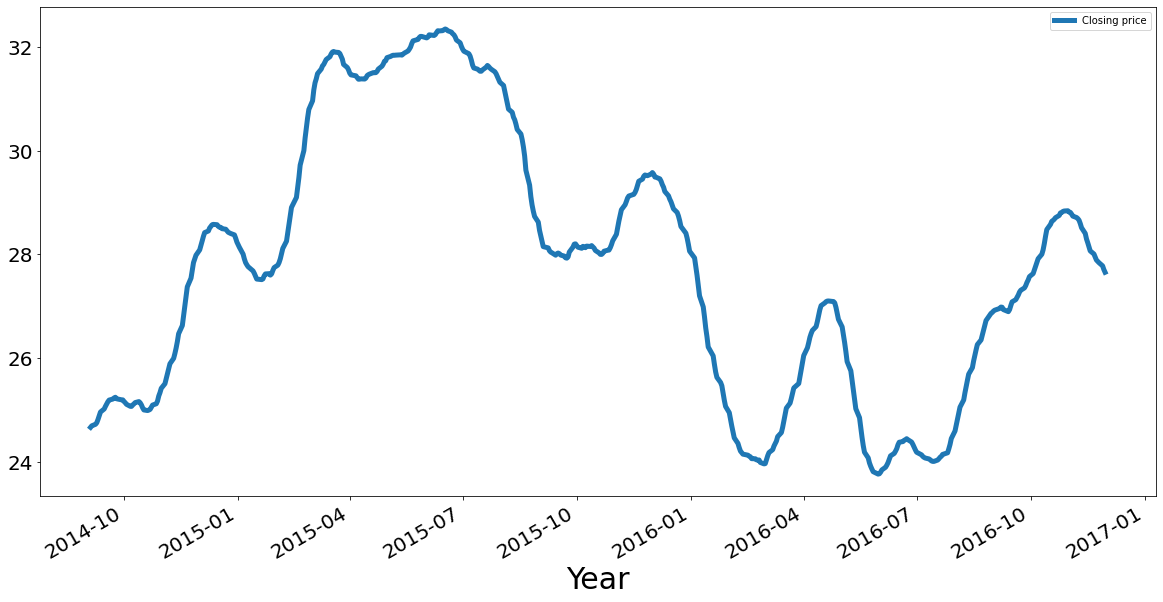

In [ ]:
# Seeing the trend more clearly
df.rolling(24).mean().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)
# Overall a rise here

Text(0.5, 0, 'Year')

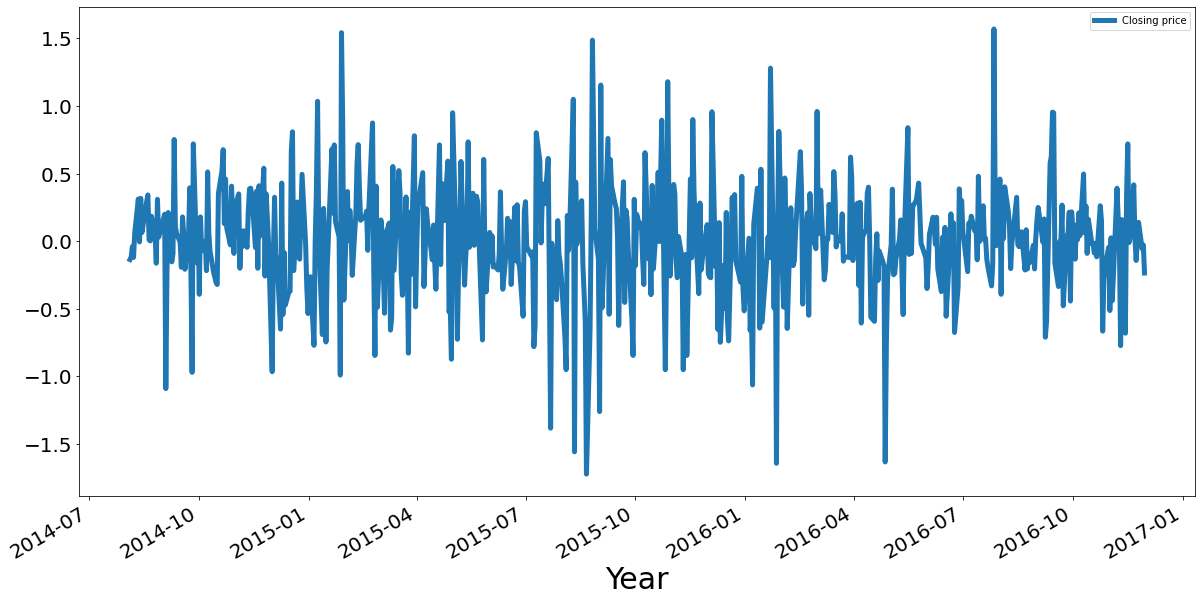

In [ ]:
# We can see that there is no specific seasonality here
# Removing trend
df.diff().plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

Text(0.5, 0, 'Year')

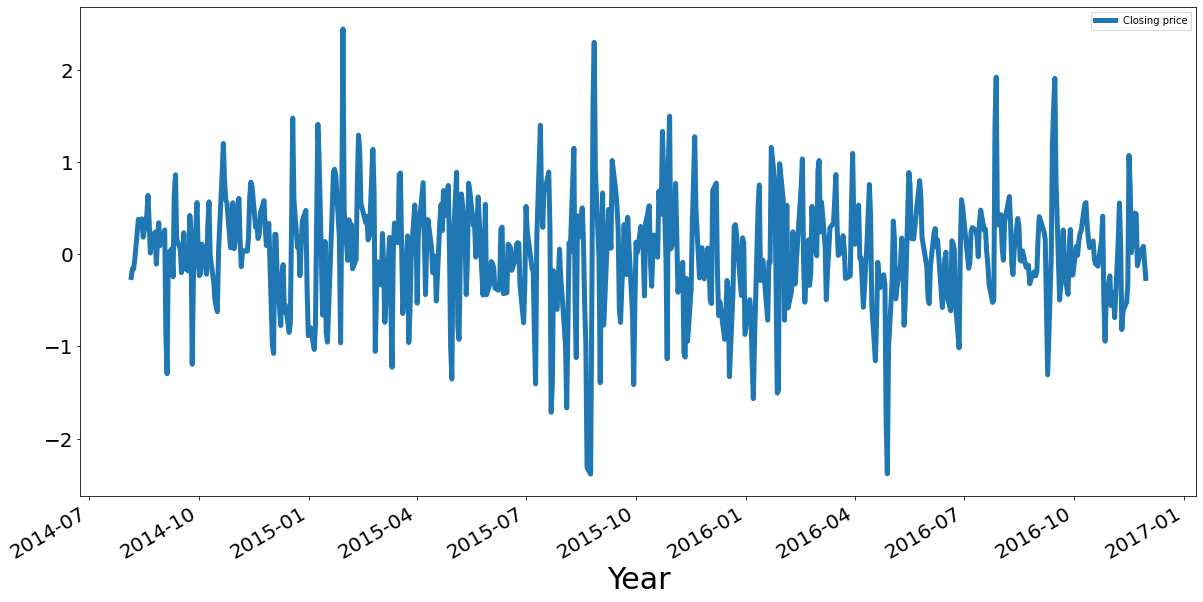

In [ ]:
# 2nd order differencing
df.diff(periods=2).plot(figsize=(20,10), linewidth=5,fontsize=20);
plt.xlabel('Year', fontsize=30)

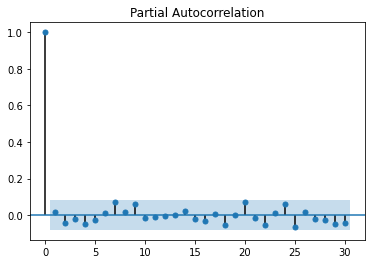

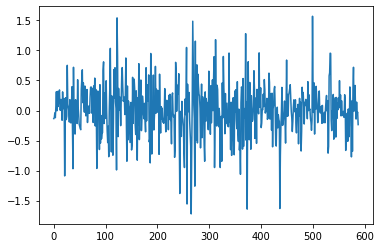

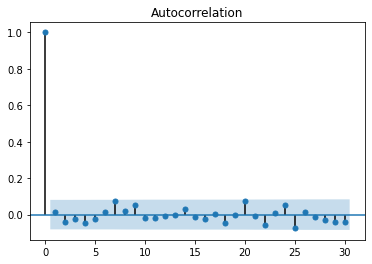

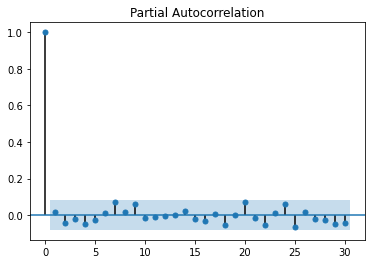

In [ ]:
# Let's take a look at its auto-corelation plots
# Before that we'll have to do manual differencing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def difference(data, lag):
    diff= []
    
    for i in range(lag, len(data)):
        value = data[i] - data[i-lag]
        diff.append(value)
    return pd.Series(diff)

df_close = df['Closing price']
X = df_close.values
diff = difference(X,1)
plt.plot(diff)
df_diff = pd.DataFrame(diff)
plot_acf(df_diff, lags=30)
plot_pacf(df_diff, lags=30)

In [ ]:
# Forecasting
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
df = df.astype(np.float64) 
Y = df.values
size = int(len(Y)*0.66)
train, test = Y[0:size], Y[size:len(Y)]


In [ ]:
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred = output[0]
    predictions.append(pred)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f'%(pred, obs))


predicted=24.160329, expected=24.530001
predicted=24.531283, expected=24.065001
predicted=24.065084, expected=24.010000
predicted=24.009943, expected=24.219999
predicted=24.220479, expected=23.672501
predicted=23.671582, expected=24.025000
predicted=24.024981, expected=24.190001
predicted=24.190400, expected=24.227501
predicted=24.227995, expected=24.172501
predicted=24.172854, expected=25.132500
predicted=25.135270, expected=25.187500
predicted=25.190402, expected=25.375000
predicted=25.378365, expected=25.752501
predicted=25.756801, expected=25.467501
predicted=25.471079, expected=25.257500
predicted=25.260547, expected=25.280001
predicted=25.283096, expected=25.292500
predicted=25.295618, expected=25.565001
predicted=25.568784, expected=25.629999
predicted=25.633934, expected=26.145000
predicted=26.150191, expected=26.492500
predicted=26.498530, expected=26.450001
predicted=26.455912, expected=26.480000
predicted=26.485969, expected=26.477501
predicted=26.483450, expected=26.680000


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", Conve

predicted=24.024984, expected=23.350000
predicted=23.348573, expected=23.010000
predicted=23.007866, expected=23.397499
predicted=23.396176, expected=23.600000
predicted=23.599101, expected=23.900000
predicted=23.899725, expected=23.972500
predicted=23.972376, expected=23.747499
predicted=23.746911, expected=23.882500
predicted=23.882190, expected=23.985001
predicted=23.984903, expected=24.170000
predicted=24.170282, expected=24.245001
predicted=24.245436, expected=24.355000
predicted=24.355659, expected=24.217501
predicted=24.217878, expected=24.697500
predicted=24.698855, expected=24.695000
predicted=24.696346, expected=24.957500
predicted=24.959377, expected=24.967501
predicted=24.969393, expected=24.990000
predicted=24.991934, expected=24.857500
predicted=24.859163, expected=24.665001
predicted=24.666274, expected=24.334999
predicted=24.335607, expected=24.167500
predicted=24.167770, expected=25.737499
predicted=25.740909, expected=26.084999
predicted=26.089096, expected=26.052500


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=26.452282, expected=26.467501
predicted=26.472313, expected=26.870001
predicted=26.875597, expected=27.092501
predicted=27.098524, expected=27.202499
predicted=27.208727, expected=27.000000
predicted=27.005819, expected=26.982500
predicted=26.988273, expected=27.045000
predicted=27.050884, expected=27.370001
predicted=27.376507, expected=27.344999
predicted=27.351444, expected=27.305000
predicted=27.311355, expected=27.270000
predicted=27.276275, expected=27.340000
predicted=27.346398, expected=27.127501
predicted=27.133475, expected=27.212500
predicted=27.218627, expected=27.007500
predicted=27.013221, expected=26.892500
predicted=26.897989, expected=26.735001
predicted=26.740178, expected=26.705000
predicted=26.710110, expected=26.500000
predicted=26.504709, expected=26.525000
predicted=26.529747, expected=26.682501
predicted=26.687539, expected=26.932501
predicted=26.938004, expected=26.924999
predicted=26.930477, expected=27.090000
predicted=27.095780, expected=26.379999


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=29.572322, expected=28.897499
predicted=28.906125, expected=28.620001
predicted=28.628120, expected=28.430000
predicted=28.437770, expected=28.385000
predicted=28.392677, expected=27.872499
predicted=27.879260, expected=27.897499
predicted=27.904292, expected=27.457500
predicted=27.463509, expected=27.209999
predicted=27.215564, expected=27.602501
predicted=27.608742, expected=27.764999
predicted=27.771513, expected=27.719999
predicted=27.726424, expected=26.947500
predicted=26.952570, expected=27.107500
predicted=27.112839, expected=26.427500
predicted=26.431651, expected=26.777500
predicted=26.782249, expected=27.497499
predicted=27.503484, expected=27.487499
predicted=27.493456, expected=27.514999
predicted=27.520993, expected=27.932501
predicted=27.939202, expected=27.950001
predicted=27.956720, expected=27.807501
predicted=27.813965, expected=27.947500
predicted=27.954193, expected=27.892500
predicted=27.899087, expected=27.865000
predicted=27.871529, expected=27.629999


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


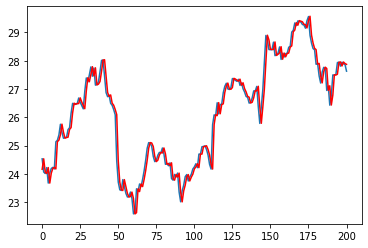

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(test, predictions)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

0.12134588182661789

#LSTM

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

importing the training data

In [ ]:
data = pd.read_csv('Apple_stock.csv')


choosing the close column

In [ ]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce') #turning the Close column to numeric
data = data.dropna() #romeving the NA values
trainData = data.iloc[:,4:5].values #selecting only the closing prices for training

scaling the values in the range of 0-1 for best preformances

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(589, 1)

preparing the data for LSTM

since its a time series problem we took 60 as timestep for our learning : given 60 closing values as an input data the 61st value is our output

In [ ]:
X_train = []
y_train = []

for i in range (60,589): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

ps : LSTM take a 3D tensor (seq_len,timestep,batch_size)

In [ ]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(529, 60, 1)

building the model

In [ ]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [ ]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)


Epoch 1/20
17/17 - 10s - loss: 0.0738
Epoch 2/20
17/17 - 3s - loss: 0.0242
Epoch 3/20
17/17 - 3s - loss: 0.0173
Epoch 4/20
17/17 - 3s - loss: 0.0150
Epoch 5/20
17/17 - 3s - loss: 0.0146
Epoch 6/20
17/17 - 3s - loss: 0.0123
Epoch 7/20
17/17 - 3s - loss: 0.0158
Epoch 8/20
17/17 - 3s - loss: 0.0123
Epoch 9/20
17/17 - 3s - loss: 0.0112
Epoch 10/20
17/17 - 3s - loss: 0.0098
Epoch 11/20
17/17 - 3s - loss: 0.0099
Epoch 12/20
17/17 - 3s - loss: 0.0107
Epoch 13/20
17/17 - 3s - loss: 0.0100
Epoch 14/20
17/17 - 3s - loss: 0.0097
Epoch 15/20
17/17 - 3s - loss: 0.0089
Epoch 16/20
17/17 - 3s - loss: 0.0079
Epoch 17/20
17/17 - 3s - loss: 0.0077
Epoch 18/20
17/17 - 3s - loss: 0.0073
Epoch 19/20
17/17 - 3s - loss: 0.0076
Epoch 20/20
17/17 - 3s - loss: 0.0114


ploting the training loss

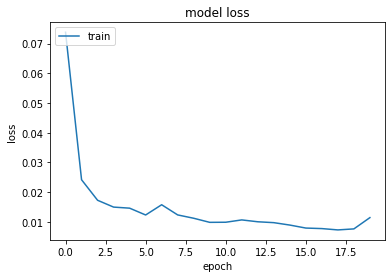

In [ ]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

testing the model on new data

In [ ]:
testData = pd.read_csv('Apple_stock.csv') #importing the test data
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce') #turning the close column to numerical type
testData = testData.dropna() #droping the NA values
testData = testData.iloc[:,4:5] #selecting the closing prices for testing
y_test = testData.iloc[60:,0:].values #selecting the labels 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length): #doing the same preivous preprocessing 
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(529, 60, 1)

In [ ]:
y_pred = model.predict(X_test) #predicting the new values


In [ ]:
predicted_price = sc.inverse_transform(y_pred) #inversing the scaling transformation for ploting


ploting the results

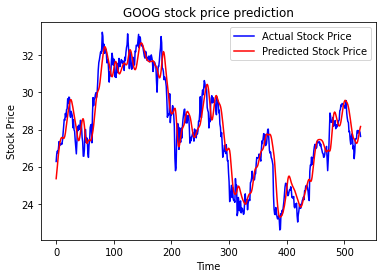

In [ ]:
plt.plot(y_test, color = 'blue', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.title('GOOG stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
#Calculation of MSE for comparing the model
difference_array = np.subtract(y_test, predicted_price)
squared_array = np.square(difference_array)
mse = squared_array.mean()
mse

0.6218421248657574